In [11]:
from qiskit import *
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance


In [25]:
freq = 87.31
notes = {'A': 110, 'B': 123.5, 'C': 65.41, 'D': 73.42, 'E': 82.41, 'F': 87.31, 'G': 98, 'H':0}
#        000       001          010         011         100         101         110       


def buildTruthTable(notes, freq):
    truthTable = ''
    for n in notes:
        if notes[n] == freq:
            truthTable+='1'
        else:
            truthTable+='0'
            
    return truthTable

truthtable = buildTruthTable(notes, freq)
print(truthtable)

00000100


In [26]:
oracle = TruthTableOracle(truthtable)
circ = oracle.construct_circuit()
circ.draw()

v_0: ───────■────────
     ┌───┐  │   ┌───┐
v_1: ┤ X ├──■───┤ X ├
     └───┘  │   └───┘
v_2: ───────■────────
          ┌─┴──┐     
o_0: ─────┤0   ├─────
          │  X │     
a_0: ─────┤1   ├─────
          └────┘

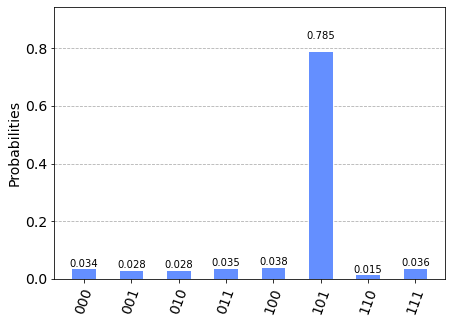

In [27]:
grover = Grover(oracle)
result = grover.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024))
plot_histogram(result['measurement'])